<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 6
## Ejercicio integrador de exámen
### Jorge Andres Niño


## Consigna

Resolver los puntos mostrados en el siguiente documento:

In [ ]:
from IPython.display import IFrame, display
IFrame("./TS4_res.pdf", width=1000, height=1000)

## Síntesis de la función transferencia y circuito normalizado.

Se presenta la síntesis de la función transferencia a partir de la función de maxima planicidad, que se usa como butterworth pero calculando la $ \omega_B$ para un filtro pasa-altos. Al llegar al polinomio final de orden 3, se aplica el nucleo de transformación, y luego se sintetiza el circuito, al calcular los valores de los componentes se emplea la $ \omega_B = \epsilon^{1/n}$

In [2]:
from IPython.display import IFrame, display
IFrame("./Ejercicio integrador teoria moderna_TS6", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [3]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_bicuad_omegayq

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt


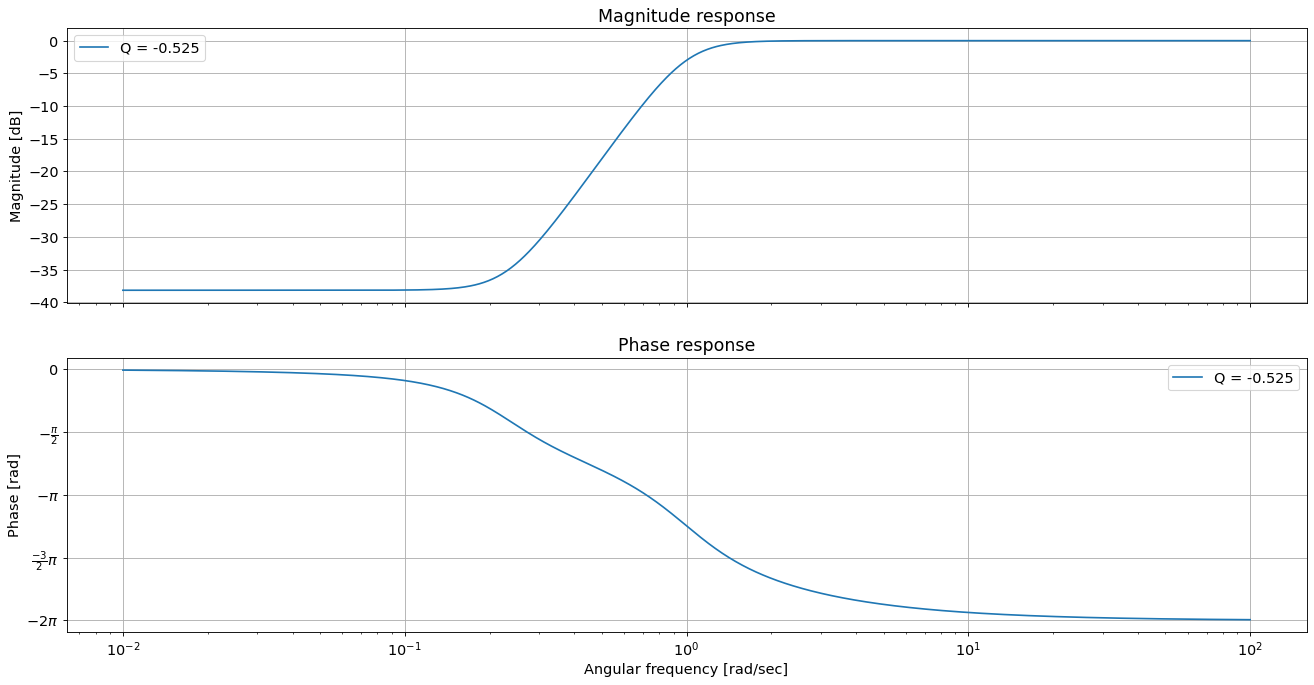

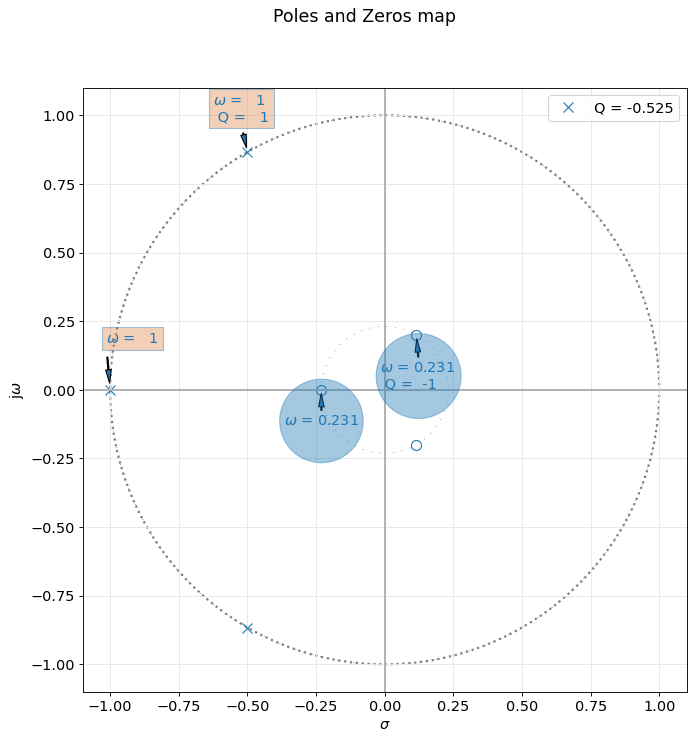

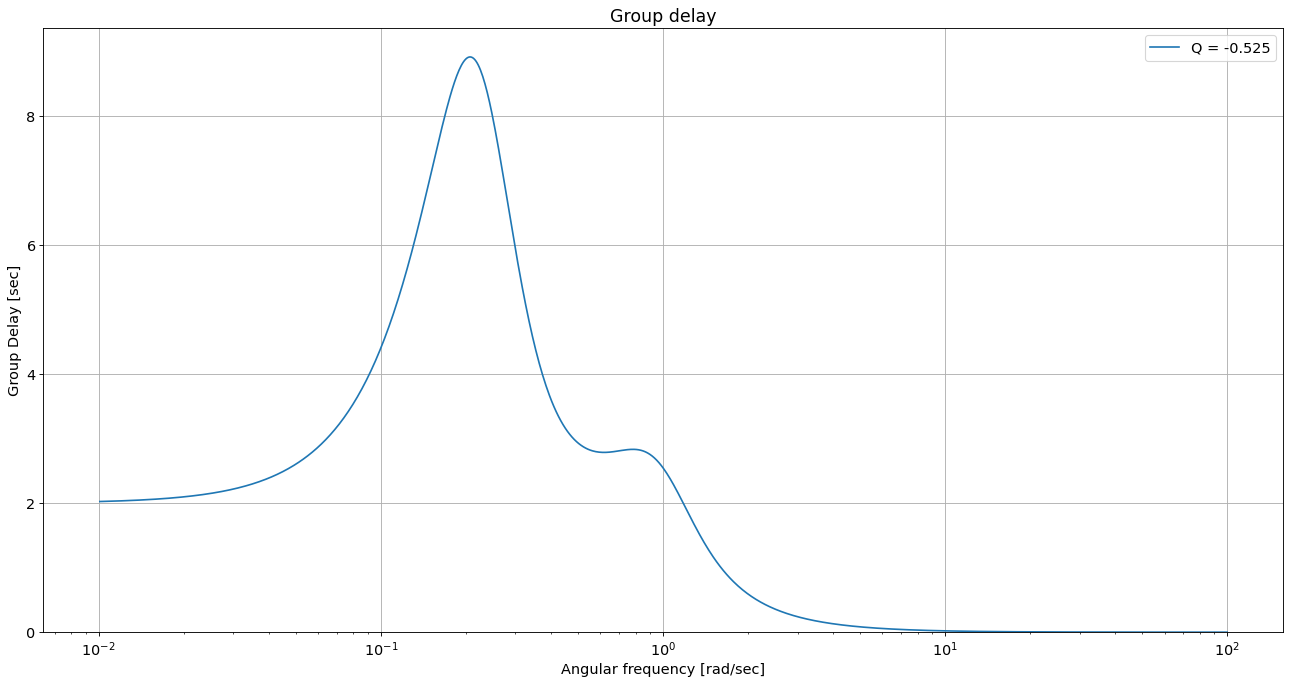

In [7]:
#%% Funcion trasnferencia:
ep= np.sqrt(0.258)
w0 = 1
wn = 1/81
Q = 1/(2*np.cos(60))
num1= np.array([w0**4,0,0,wn])
den1 = np.array([w0**3, 2*w0**2, 2*w0, 1])
H1 = Funcion.TransferFunction( num1, den1 )
fig_sz_x = 20
fig_sz_y = 10
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
#_, axes_hdl = bodePlot(H1)
# para que se vea como uno intuye el módulo. Probar comentar las siguientes 2 líneas
#plt.sca(axes_hdl[0])
#plt.ylim([-40,10])
#plt.gca
#pzmap(H1)
#plt.rcParams['figure.figsize'] = (30,30)
#plt.show()
analyze_sys(H1, sys_name='Q = {:3.3f}'.format(Q))

Simulamos el sistema con los valores calculados en el apartado del PDF, y luego aplicamos la trasnformación en frecuencia y en impedancia para obtener las respuestas deseadas en LTSPICE:

![*Figura 6*](LTCIR.png)

![*Figura 7*](LTSIM.png)

En la figura de la respuesta en frecuencia podemos observar que el primer cursor nos señala $-0.971 db$ a $40.04 KHz$ con lo cual podemos decir que cumplimos con esa parte de la plantilla. Luego en $f= 9.993KHz$, con el segundo cursor obtenemos una atenuaicion de $30.07 db$, que es casi exacto el valor requerido en la plantilla.

## Implementación GIC

Como observamos pudimos obtener una respuesta que cumple con la plantilla requerida.
A continaución podriamos activar el inductor, empleando directamente el GIC, pues esta diseñado para estar con un extremo del circuito a la masa del sistema. Calculamos así los valores del GIC que vendran dados por las siguientes ecuaciones:
$$C_{gic} = C1 = 100 nf$$
$$R_{gic} = \sqrt{L1/C3}$$

![*Figura 8*](LTCIRGIC.png)

![*Figura 9*](LTSIMGIC.png)

Obtuvimos la misma respuesta, pero sin emplear inductores, activando el circuito y empelando solo resistores y capacitores.

# Conclusiones:
 

* Se presento la solución a una plantilla de un filtro pasa-altos empleando la transformación en frecuencia, pasando a una plantilla pasa-bajos prototipo, obteniendo la función transferencia y luego transformandola mediante el núcleo $1/s$, luego solo desnormalizando mediante la $\omega_B = \epsilon^{1/n}$ podemos obtener la respuesta deseada de forma muy sencilla.
* La activación del inductor mediante el uso de un GIC, dada la configuración del pasa-altos se facilita mas que en el caso del pasa-bajos por no tener que hacer la transformación de brutton.